<h1>Data Mining Quiz</h1>

Classification for <a href="https://www.kaggle.com/arshid/iris-flower-dataset">Iris Flower Dataset</a>


<h2>Import Libraries</h2>
<ul>
    <li>pandas: Data manipulation and analysis</li>
    <li>numpy: Linear Algebra and scientific computing python</li>
    <li>seaborn: Statistical data visualization</li>
    <li>matplotlib: static, animated, and interactive visualizations</li>
</ul>

In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

<h2>Data Load</h2>

In [3]:
# load dataset
df = pd.read_csv('IRIS.csv')

View IRIS.csv dataset

In [7]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()
iris.species.value_counts() # Iris flower species

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Dapat dilihat dari dataset tersebut bahwa setiap spesies memiliki jumlah masing-masing 50 dataset

## Data Visualization
Distribusi panjang dari setiap spesies yang ada. 

Text(0.5, 1.0, 'Distribusi panjang dan lebar kelopak bunga')

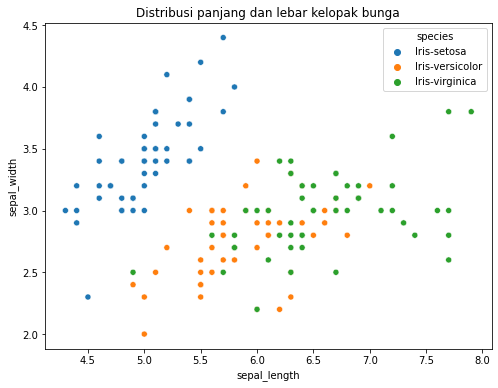

In [11]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species).set_title("Distribusi panjang dan lebar kelopak bunga")

jika dilihat dari grafik distribusi diatas diketahui bahwa spesies bernama Iris-Setosa memiliki ciri untuk kelopak bunga yang lebar dan yang spesies yang paling panjang adalah ciri dari Iris-Virginica

## Label Encoding
karena attribute dataset 'species' bersifat categorial maka attribute tersebut bisa di encoding mengguakan library sklearn.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
 # proses encoding attribut species menjadi 0,1,2
iris['species'] = label_encoding.fit_transform(iris['species'])
iris.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,0
72,6.3,2.5,4.9,1.5,1
38,4.4,3.0,1.3,0.2,0
92,5.8,2.6,4.0,1.2,1
138,6.0,3.0,4.8,1.8,2


## Set X dan Y

In [14]:
# IMPORT SKLEARN untuk evaluasi model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
y = iris.species # yang ingin di klasifikasi
X = iris.drop('species',axis=1)

In [18]:
X.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
26,5.0,3.4,1.6,0.4
145,6.7,3.0,5.2,2.3
8,4.4,2.9,1.4,0.2


## Membagi dataset menjadi train dataset dan test dataset

### Disini saya memberikan besar test dataset sejumlah 30%

In [19]:
from sklearn.model_selection import KFold, train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # 30% dari dataset digunakan untuk test dataset


## Menggunakan Algoritma Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forrest = RandomForestClassifier(n_estimators=100)
random_forrest.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = random_forrest.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
from __future__ import division
print('Akurasi Random Forrest: ' + "{:.1%}".format(accuracy_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Akurasi Random Forrest: 97.8%


### Penjelasan:
Maka setelah dilakukan prediksi terhadap test dataset didapatkan akurasi sebesar 98% untuk algoritma Random Forrest. hal ini juga dikarenakan dataset yang relatif kecil, dimana dari source yang ada <a href="http://learningbox.coffeecup.com/05_2_randomforest.html">disini</a> bahwa akurasi dari <u>algoritma Random Forrest memiliki pengaruh dengan banyaknya dataset.</u>

## Menggunakan Algoritma Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = naive_bayes_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Akurasi Random Forrest: ' + "{:.1%}".format(accuracy_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Akurasi Random Forrest: 100.0%


### Penjelasan: 

Setelah dilakukan prediksi dengan menggunakan test dataset maka dihasilkan akurasi senilai 100%, hal ini dikarenakan sifat dari algoritma <u>Naive Baiyes dimana algoritma naive baiyes tidak perlu membutuhkan dataset yang besar untuk menghasilkan akurasi yang bagus. berikut sourcenya</u> <a href="https://www.dictio.id/t/apa-saja-kelebihan-dan-kekurangan-metode-naive-bayes/12476/2">disini</a> 

# KESIMPULAN

<p>Setelah dilakukannya klasifikasi untuk bunga Iris menggunakan algoritma Naive-Baiyes dan Random Forrest, didapatkan bahwa dalam kasus ini akurasi tertinggi didapatkan sebesar 100% dengan menggunakan algoritma Naive-Baiyes, hasil ini besar dipengaruhi oleh besar dataset yang digunakan, dimana random forrest akan menghasilkan akurasi yang lebih baik jika menggunakan dataset yang lebih banyak</p>